# Data Exploration

**Author**: Maleakhi Agung Wijaya  
**Email**: *maw219@cam.ac.uk*  
**Description**: This file contains code used for data loading, processing, and analysis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from os.path import join
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_absolute_error as mae
import os
from pathlib2 import Path
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models, backend as K, callbacks

In [2]:
%run Utilities.ipynb

## Load data

In this step, we load all datasets that we have.

In [3]:
market_orders, n_markets, aggregated_datasets = load_aggregated_datasets([DATASET_DJI, 
                                                                          DATASET_NASDAQ, 
                                                                          DATASET_NYSE,
                                                                          DATASET_RUSSELL, 
                                                                          DATASET_SP ,
                                                                          DATASET_AAPL,
                                                                          DATASET_MSFT,
                                                                          DATASET_AMZN])

## AAPL
aapl_df = aggregated_datasets["AAPL"]

## AMZN
amzn_df = aggregated_datasets["AMZN"]

## MSFT
msft_df = aggregated_datasets["MSFT"]

In [4]:
## AAPL
for col, n_null in zip(aapl_df.columns, aapl_df.isnull().sum()):
    print(f"{col}: {n_null}")

Open: 0
Close: 0
Adj Close: 0
Volume: 0
Down-F: 2
Sp500: 2
Nasdaq: 2
Russel: 2
Gold: 2
Silver: 3
Eur_usd: 5
Nikkei: 136
Gpb_usd: 5
Usd_jpy: 5
Fste: 42
Sugar: 3
Nat_Gas: 2
Corn-F: 4
Coffe-F: 4
Feeder-F: 13
Vix: 0
Tnx: 2
Bzf: 34
Upper_bb: 0
Middle_bb: 0
Lower_bb: 0
Sma: 0
Mom5: 0
Mom10: 0
Mom15: 0
Mom20: 0
Slow_k: 0
Slow_d: 0
Fast_k: 0
Fast_d: 0
Trix: 0
William_R: 0
Rocr: 0
Pro: 0
Mfi: 0
Macd: 0
Macd_sig: 0
Apo: 0
Aroon_up: 0
Aroon_down: 0
Cci: 0
Cmo: 0
Dx: 0
Ultosc: 0
MOVEMENT: 0


In [5]:
aapl_df.shape[0] - aapl_df.dropna().shape[0]

222

In [6]:
## NASDAQ
for col, n_null in zip(amzn_df.columns, amzn_df.isnull().sum()):
    print(f"{col}: {n_null}")

Open: 0
Close: 0
Adj Close: 0
Volume: 0
Down-F: 2
Sp500: 2
Nasdaq: 2
Russel: 2
Gold: 2
Silver: 3
Eur_usd: 5
Nikkei: 136
Gpb_usd: 5
Usd_jpy: 5
Fste: 42
Sugar: 3
Nat_Gas: 2
Corn-F: 4
Coffe-F: 4
Feeder-F: 13
Vix: 0
Tnx: 2
Bzf: 34
Upper_bb: 0
Middle_bb: 0
Lower_bb: 0
Sma: 0
Mom5: 0
Mom10: 0
Mom15: 0
Mom20: 0
Slow_k: 0
Slow_d: 0
Fast_k: 0
Fast_d: 0
Trix: 0
William_R: 0
Rocr: 0
Pro: 0
Mfi: 0
Macd: 0
Macd_sig: 0
Apo: 0
Aroon_up: 0
Aroon_down: 0
Cci: 0
Cmo: 0
Dx: 0
Ultosc: 0
MOVEMENT: 0


In [7]:
amzn_df.shape[0] - amzn_df.dropna().shape[0]

222

In [8]:
# Fill missing values, do some scaling (run prev cell first)
list_stock_df = []


for df in [aapl_df, msft_df, amzn_df]:
    columns = df.columns
    df.fillna(0, inplace=True) # fill na with 0
    y = df["MOVEMENT"].copy()
    X = df.drop(columns=["MOVEMENT"]).copy()
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X))
    X["MOVEMENT"] = np.array(y)
    X.columns = columns
    list_stock_df.append(X)
    
### Clean dataframe (full features)


aapl_df_full = list_stock_df[0]
msft_df_full = list_stock_df[1]
amzn_df_full = list_stock_df[2]

## Exploring the attributes

In this section, we examine the attributes, including correlation with class variable, class distribution, key variables distributions.

#### Correlation

In [9]:
## DJI
corr_appl = aapl_df_full.drop(columns=["MOVEMENT"]).corr()
print(corr_appl["Close"].sort_values(ascending=False))

Close         1.000000
Open          0.999602
Adj Close     0.999383
Middle_bb     0.998948
Lower_bb      0.998310
Upper_bb      0.998285
Sma           0.992748
Nasdaq        0.968439
Russel        0.968439
Gold          0.968439
Down-F        0.952279
Sp500         0.944423
Nikkei        0.658649
Usd_jpy       0.573794
Fste          0.477579
Macd_sig      0.339242
Macd          0.330052
Mom20         0.260797
Apo           0.255132
Mom15         0.235773
Mom10         0.202650
Cmo           0.172856
Mom5          0.151277
Aroon_down    0.149591
Trix          0.147468
Mfi           0.146719
Ultosc        0.129462
Cci           0.122403
William_R     0.118922
Slow_d        0.111697
Pro           0.109257
Fast_d        0.106210
Slow_k        0.106210
Fast_k        0.091272
Rocr          0.084428
Dx            0.068128
Feeder-F      0.005144
Tnx          -0.016295
Aroon_up     -0.087500
Vix          -0.309410
Nat_Gas      -0.497209
Bzf          -0.499422
Volume       -0.599069
Eur_usd    

<AxesSubplot:title={'center':'Strength of Correlation'}>

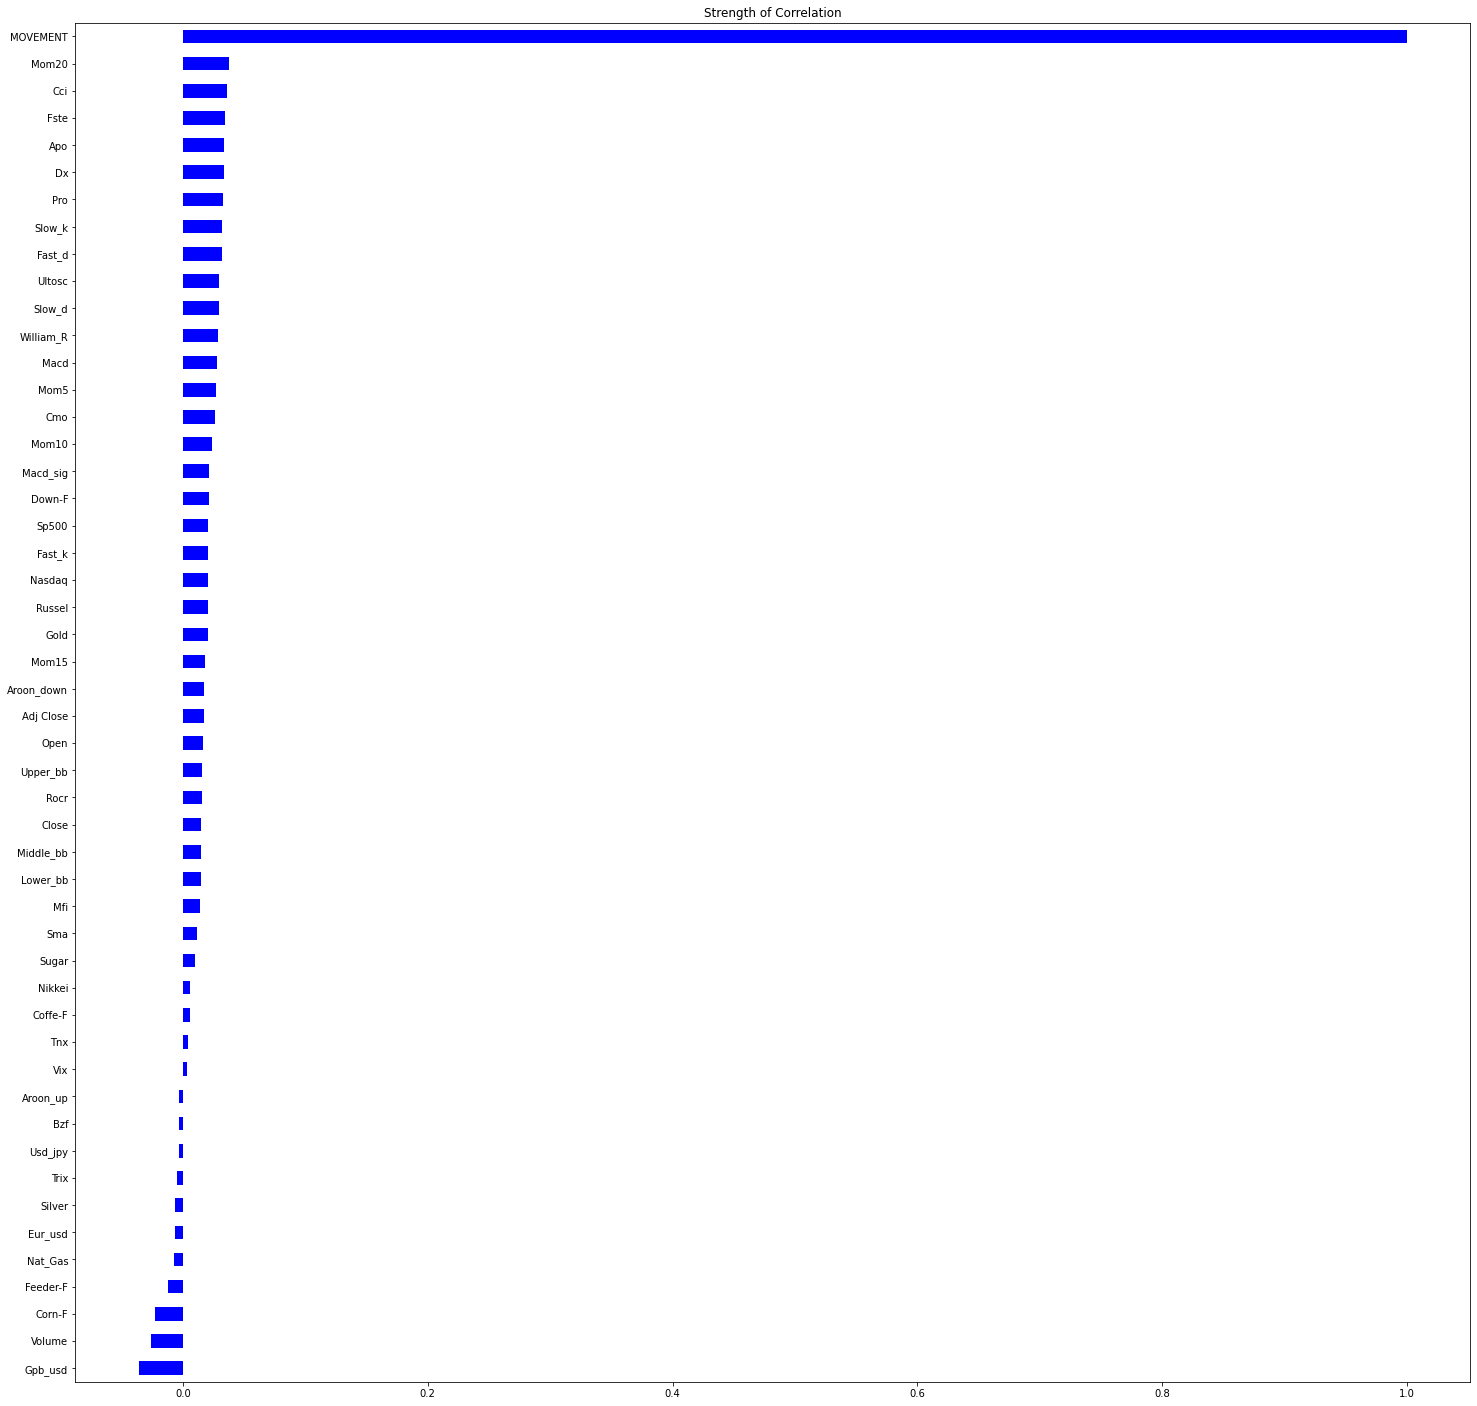

In [10]:
## DJI
plt.figure(figsize= (25,25))
corr = aapl_df_full.corrwith(aapl_df_full["MOVEMENT"])
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

In [11]:
# selected_features = ['CTB1Y','AMZN','FCHI','XAG','HSI']
# import seaborn as sns
# sns.pairplot(corr_dji[selected_features],size=1.5)

Correlation matrix of all features. 
Colours closer to red indicate more positive correlations, while those
closer to blue indicate negative correlations. 
# positive correlations : A positive correlation is a relationship between two variables that move in tandem—that is, in the same direction
# negative correlations : A negative correlation is a relationship between two variables such that as the value of one variable increases, the other decreases

The correlation between all numerical features. 
We observed that some features were strongly correlated (depicted by red and blue cells) with others (e.g., Gold was strongly positively correlated (> 0:5) with Close, Nasdaq , Russel and Usd_jpy was strongly negatively correlated (< −0:5) with Silver). The highly correlated features suggested that some features were redundant and could be removed, as they provided minimal additional information for the task, but introduced unnecessary complexity. One method for reducing complexity is to apply dimensionality reduction techniques, such as principal component analysis (PCA)

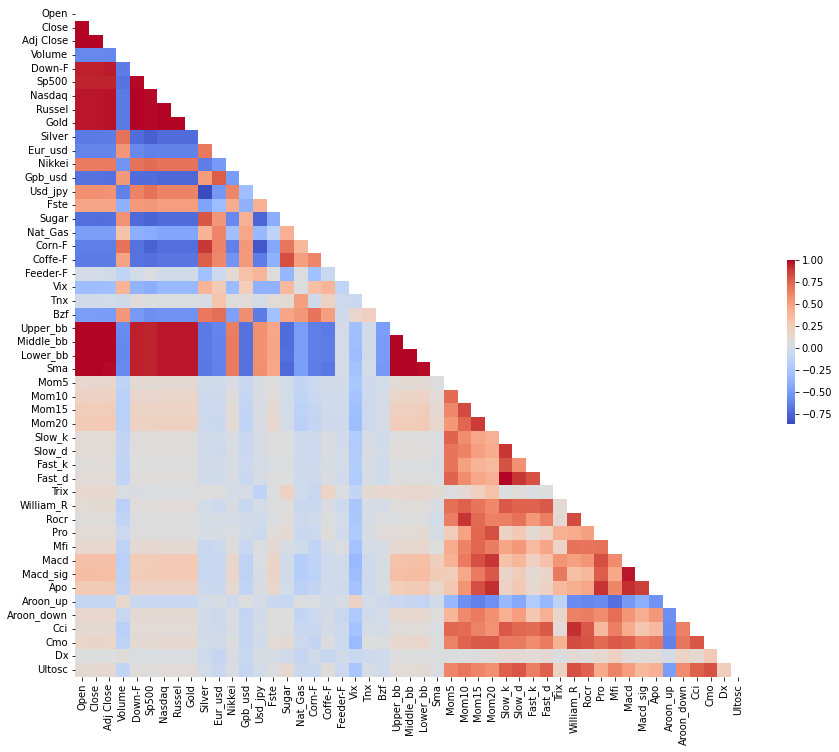

In [12]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_appl)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_appl,
            xticklabels=corr_appl.columns,
            yticklabels=corr_appl.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.2},
           cmap="coolwarm")
plt.show()

In [13]:
corr_amzn = amzn_df_full.drop(columns=["MOVEMENT"]).corr()
print(amzn_df_full["Close"].sort_values(ascending=False))

1983    2.266827
2198    2.234948
2195    2.228786
2000    2.221160
1982    2.220695
          ...   
20     -0.970321
1      -0.970717
2      -0.970717
22     -0.971268
21     -0.972249
Name: Close, Length: 2316, dtype: float64


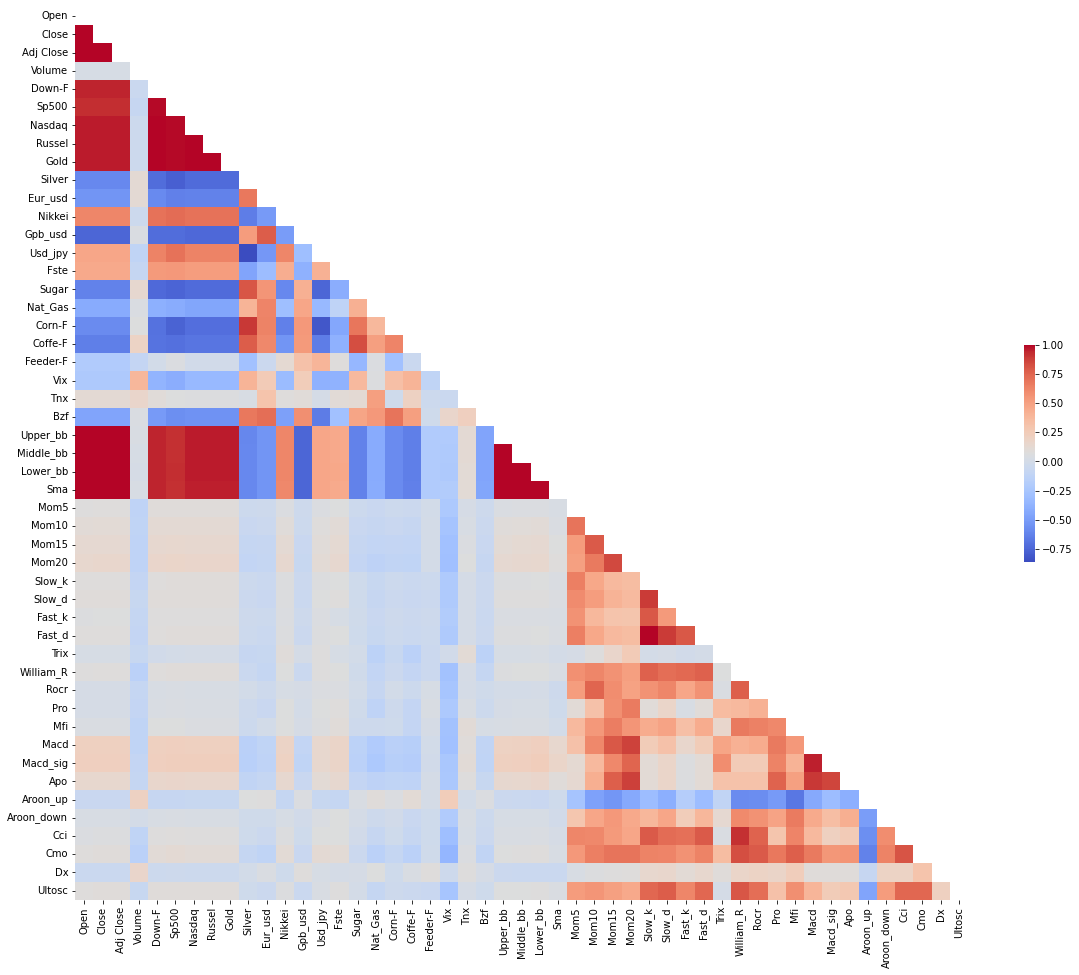

In [14]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_amzn)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_amzn,
            xticklabels=corr_amzn.columns,
            yticklabels=corr_amzn.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.2},
           cmap="coolwarm")
plt.show()

#### Class Distribution

In [15]:
aapl_df["MOVEMENT"].value_counts()

1    1217
0    1099
Name: MOVEMENT, dtype: int64

In [16]:
amzn_df_full["MOVEMENT"].value_counts()

1    1236
0    1080
Name: MOVEMENT, dtype: int64

In [17]:
appl_class = aapl_df_full[["MOVEMENT"]]
appl_class["dataset_name"] = ["AAPL" for i in range(appl_class.shape[0])]

amzn_class = amzn_df_full[["MOVEMENT"]]
amzn_class["dataset_name"] = ["AMZN" for i in range(amzn_class.shape[0])]

In [18]:
# Concatenate
merge_df = pd.concat([amzn_class, appl_class], ignore_index=True)

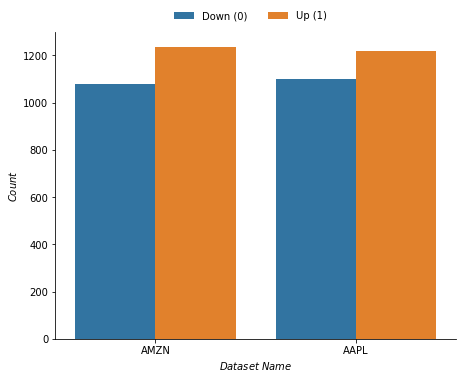

In [19]:
g = sns.catplot(x='dataset_name', hue='MOVEMENT', 
            kind='count', data=merge_df, ci=False, aspect=1.3,
               legend=False)
plt.xlabel("$Dataset$ $Name$")
plt.ylabel("$Count$")
plt.legend(labels=["Down (0)", "Up (1)"],
          bbox_to_anchor=[0.7,1.1], ncol=2, frameon=False)

plt.show()

#### Histogram plot of features

In [20]:
aapl_df_full.drop(columns=["MOVEMENT"])

,Open,Close,Adj Close,Volume,Down-F,Sp500,Nasdaq,Russel,Gold,Silver,...,Mfi,Macd,Macd_sig,Apo,Aroon_up,Aroon_down,Cci,Cmo,Dx,Ultosc
0,-1.328573,-1.328258,-1.274402,3.952927,-1.440084,-1.517693,-1.329496,-1.329496,-1.329496,0.420300,...,1.704372,0.336911,0.242968,0.123258,-1.116697,1.150856,1.455487,2.099084,1.486710,2.146791
1,-1.368736,-1.350903,-1.293449,4.624241,-1.460728,-1.543530,-1.344295,-1.344295,-1.344295,0.334064,...,0.955027,0.337430,0.266208,0.150014,-0.518761,0.958908,0.622434,1.098725,-0.447948,1.485455
2,-1.353811,-1.348135,-1.291122,2.169203,-1.436441,-1.523929,-1.335388,-1.335388,-1.335388,0.345508,...,1.399663,0.335586,0.284412,0.194579,-0.718073,0.766961,0.653597,1.145019,-0.411094,1.472180
3,-1.344857,-1.350823,-1.293382,1.351923,-1.432393,-1.522147,-1.337444,-1.337444,-1.337444,0.246738,...,1.325825,0.322512,0.296223,0.203433,-0.917385,0.575013,0.519134,1.033128,-0.371281,1.062211
4,-1.353625,-1.356278,-1.297971,0.493735,-1.430976,-1.513238,-1.324289,-1.324289,-1.324289,0.247010,...,1.337375,0.296020,0.300096,0.218007,-1.116697,0.383066,0.278031,0.804257,-0.435339,1.025734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,3.056184,3.115494,3.127634,-0.823243,2.102822,2.133299,2.305651,2.305651,2.305651,-0.532524,...,1.521863,2.323423,2.188550,1.606158,-1.116697,1.150856,0.739388,1.409986,1.224537,1.235056
2312,3.133793,3.120523,3.132495,-1.063835,2.094322,2.130626,2.307296,2.307296,2.307296,-0.484297,...,1.511090,2.387857,2.254261,1.733519,-1.116697,1.150856,0.714082,1.427110,1.293169,0.955172
2313,3.136218,3.225577,3.234052,-0.849423,2.116787,2.164035,2.348268,2.348268,2.348268,-0.465633,...,1.531032,2.588988,2.349165,2.049888,-1.116697,1.150856,0.982791,1.745568,1.765651,1.223106
2314,3.253749,3.223528,3.232071,-0.594175,2.114966,2.151563,2.336757,2.336757,2.336757,-0.471763,...,1.568153,2.710359,2.450635,2.315660,-0.917385,1.150856,1.069098,1.725050,2.051973,0.662915


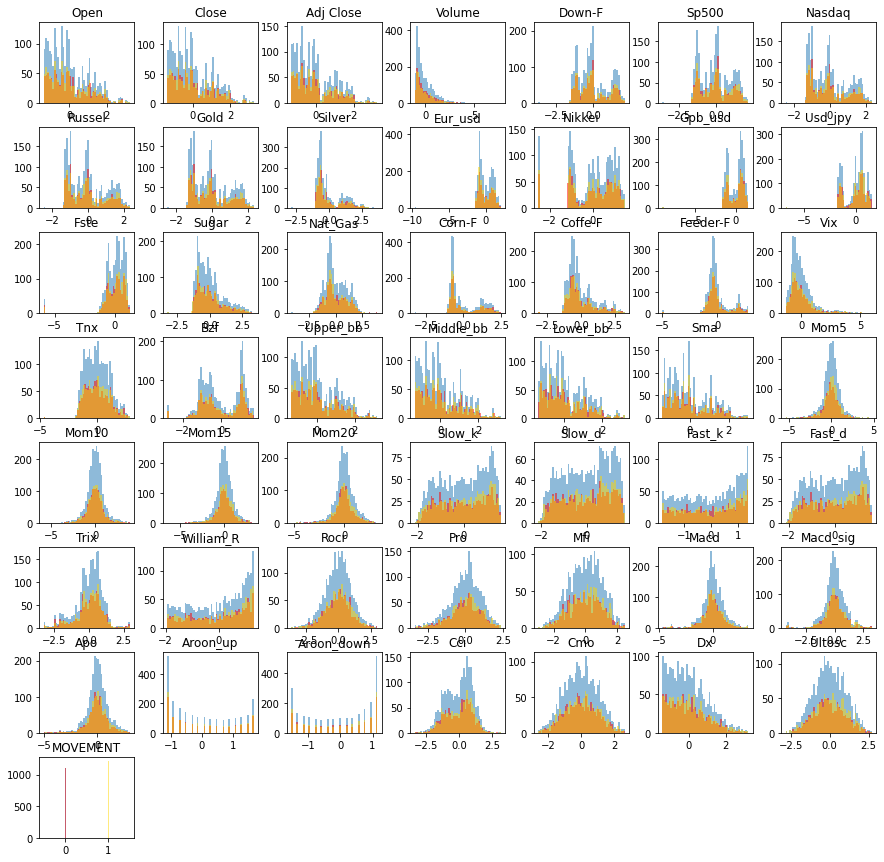

In [21]:
## DJI NASDAQ, ETC
ax = aapl_df_full.hist(bins=50, alpha=0.5, label="Full", grid=False, figsize=(15, 15))
aapl_df_full[aapl_df_full["MOVEMENT"] == 0].hist(bins=50, ax=ax.ravel()[:50], grid=False, color="r", alpha=0.5, label="Down")
aapl_df_full[aapl_df_full["MOVEMENT"] == 1].hist(bins=50, ax=ax.ravel()[:50], color="gold",grid=False, alpha=0.5, label="Up")
plt.show()

#### Feature selection with respect to label

In [22]:
fs = SelectKBest(score_func=f_classif)
X_selected = fs.fit_transform(aapl_df_full.drop(columns=["MOVEMENT"]), aapl_df_full["MOVEMENT"])

In [23]:
y = fs.scores_
x = aapl_df_full.drop(columns=["MOVEMENT"]).columns

A bar chart of the feature importance scores for each input feature is created. 
This clearly shows that feature Mom-20 might be the most relevant feature

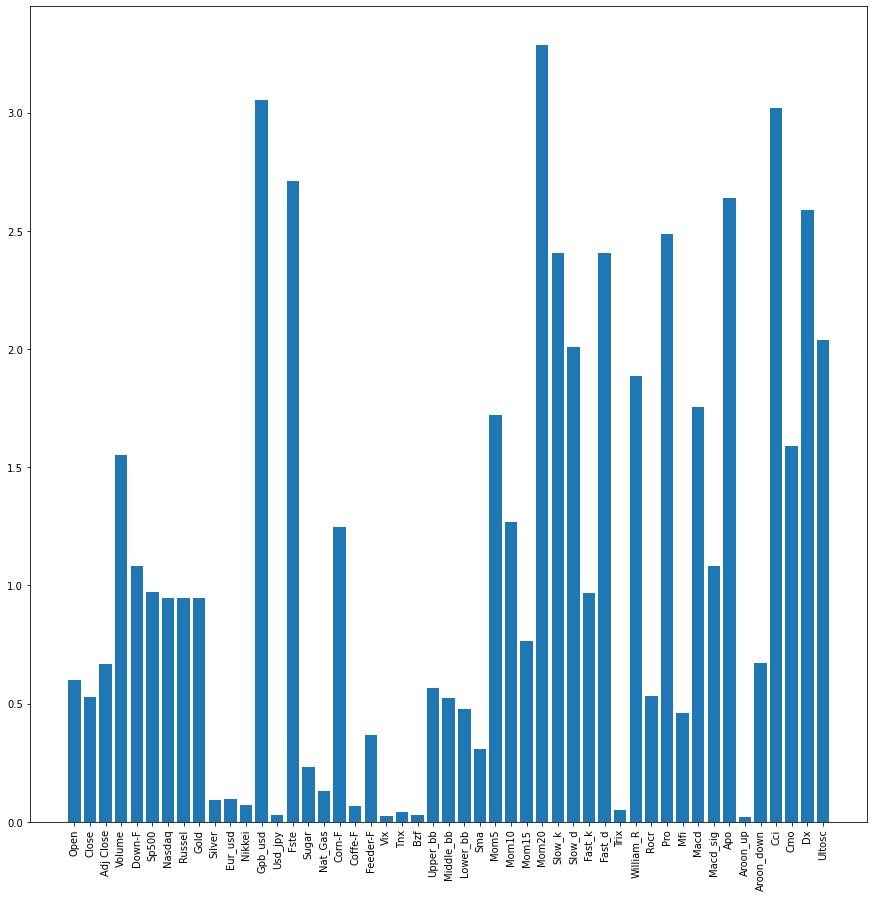

In [24]:
fig = plt.figure(figsize=(15, 15))
plt.bar([i for i in range(len(y))], y)
plt.xticks(range(0,len(x)), x , rotation='vertical')
plt.show()

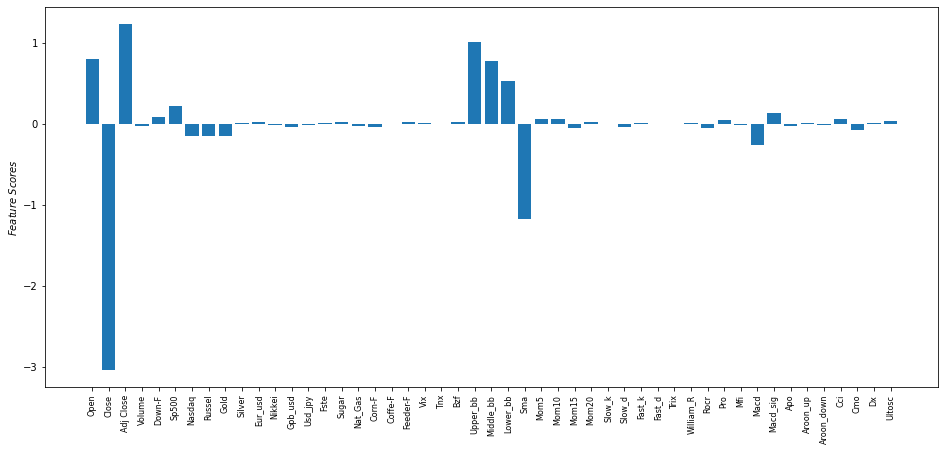

In [25]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = LinearRegression()
model.fit(aapl_df_full.drop(columns=["MOVEMENT"]), aapl_df_full["MOVEMENT"])
importance = model.coef_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(16, 7))
pyplot.bar([x for x in range(len(importance))], importance)
plt.ylabel("$Feature$ $Scores$")
plt.xticks(range(0,len(x)), x , rotation = 'vertical' , fontsize  = 8)
pyplot.show()

The impurity-based feature importance ranks the numerical features to be the most important features. As a result, the non-predictive random_num variable is ranked as one of the most important features!

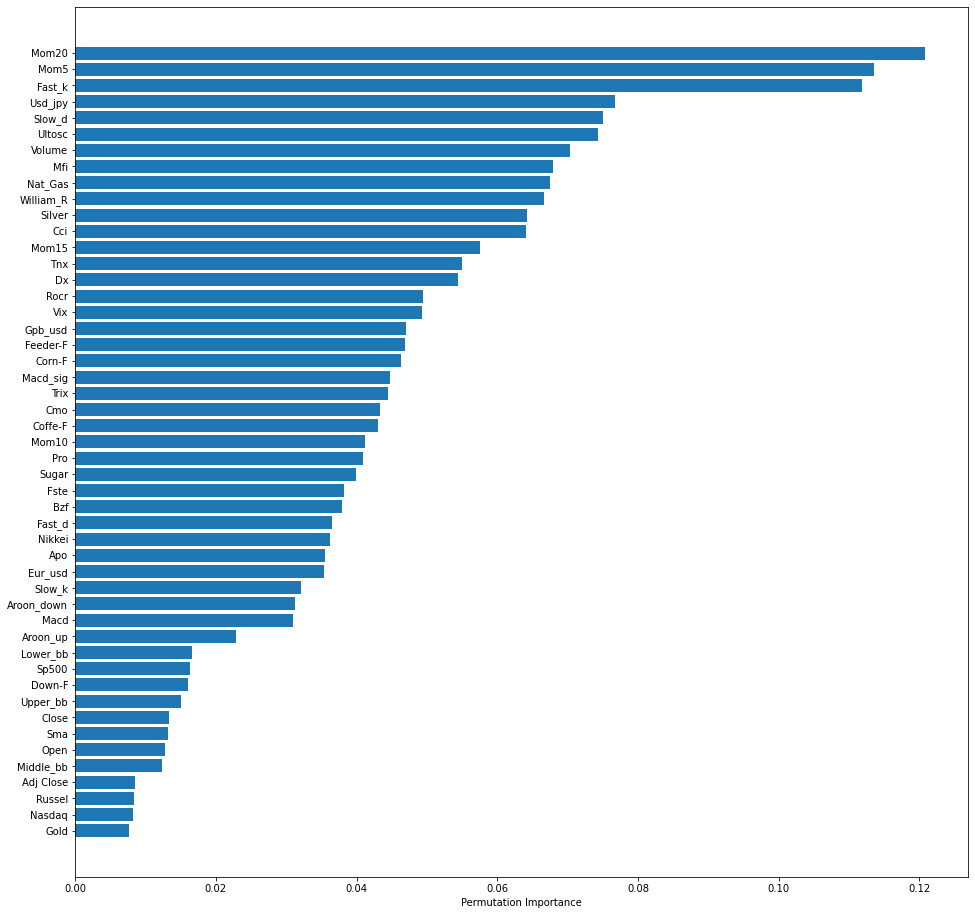

In [26]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(aapl_df_full.drop(columns=["MOVEMENT"]), aapl_df_full["MOVEMENT"])

perm_importance = permutation_importance(model, aapl_df_full.drop(columns=["MOVEMENT"]), aapl_df_full["MOVEMENT"],
                                        n_repeats = 10, random_state=0)
sorted_idx = perm_importance.importances_mean.argsort()
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(16, 16))
plt.barh(x[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.yticks(fontsize = 10)
pyplot.show()

A more appropriate feature importance metric to measure the importance of numerical features with categorical labels is the analysis of variance (ANOVA) correlation coefficient. We calculated the ANOVA F-value for verifying the existence of equal
variance between a group of a categorical feature to continuous responses for all features for
all datasets, as shown

Feature importance scores according to ANOVA F-value for all datasets. The plots are ordered as
follows: DJI, NASDAQ, NYSE, RUSSELL, and S&P 500.

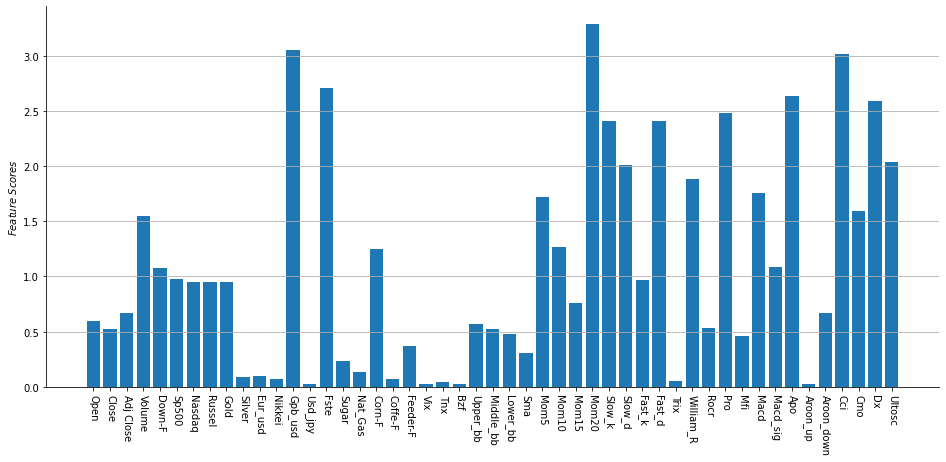

In [27]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
plt.bar(x , y)
plt.xticks(rotation=-90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("$Feature$ $Scores$")
plt.grid(axis="y")
plt.show()

In [28]:
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR


selector = RFECV(estimator = LogisticRegression(), step=1, cv=5 , min_features_to_select = 5)
selector = selector.fit(aapl_df_full.drop(columns=["MOVEMENT"]), aapl_df_full["MOVEMENT"])

print(len(selector.ranking_))
for i in range(len(selector.ranking_)):
    if selector.ranking_[i] == 1:
	    print('Column: %s, Selected %s, Rank: %.3f' % (x[i], selector.support_[i] , selector.ranking_[i]))


49
Column: Open, Selected True, Rank: 1.000
Column: Close, Selected True, Rank: 1.000
Column: Adj Close, Selected True, Rank: 1.000
Column: Lower_bb, Selected True, Rank: 1.000
Column: Sma, Selected True, Rank: 1.000
Column: Macd, Selected True, Rank: 1.000


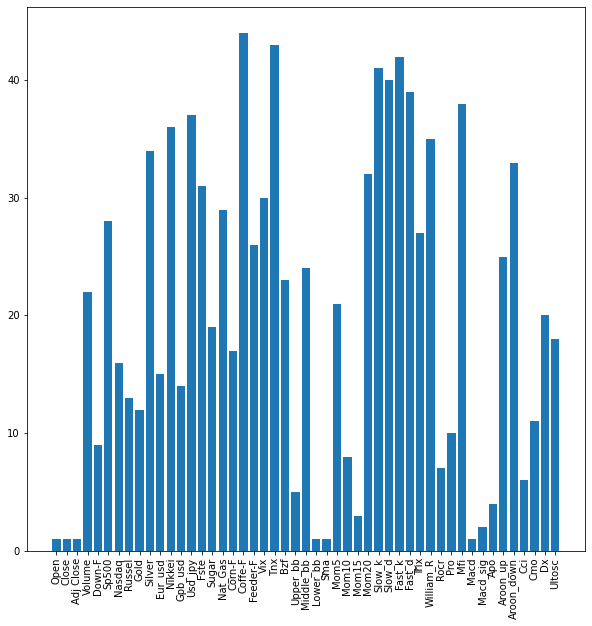

In [29]:
fig = plt.figure(figsize=(10, 10))
plt.bar([i for i in range(len(selector.ranking_))], selector.ranking_)
plt.xticks(range(0,len(x)), x , rotation='vertical')
plt.show()

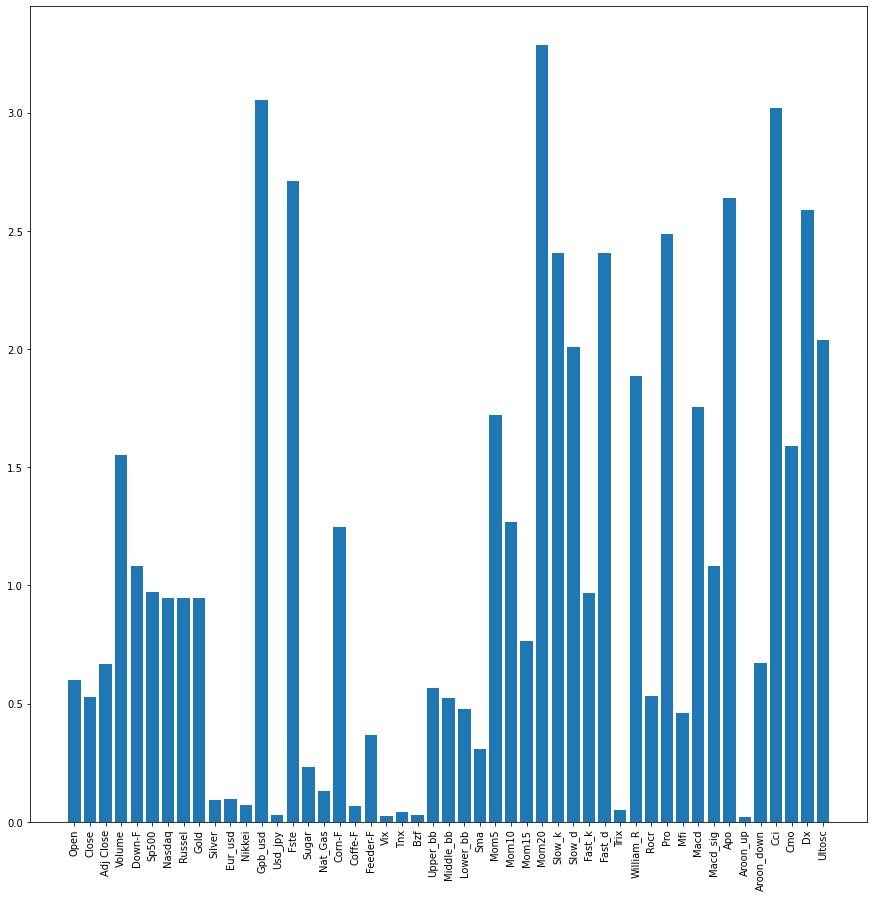

In [30]:
fig = plt.figure(figsize=(15, 15))
plt.bar([i for i in range(len(y))], y)
plt.xticks(range(0,len(x)), x , rotation='vertical')
plt.show()

In [31]:

# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE


# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select= 10)
# evaluate model

rfe.fit(aapl_df_full.drop(columns=["MOVEMENT"]), aapl_df_full["MOVEMENT"])

for i in range(aapl_df_full.drop(columns=["MOVEMENT"]).shape[1]):
    if rfe.support_[i] == True:
	    print('Column: %s, Selected %s, Rank: %.3f' % (x[i], rfe.support_[i] , rfe.ranking_[i]))

Column: Silver, Selected True, Rank: 1.000
Column: Tnx, Selected True, Rank: 1.000
Column: Mom5, Selected True, Rank: 1.000
Column: Slow_k, Selected True, Rank: 1.000
Column: Fast_k, Selected True, Rank: 1.000
Column: William_R, Selected True, Rank: 1.000
Column: Mfi, Selected True, Rank: 1.000
Column: Macd_sig, Selected True, Rank: 1.000
Column: Apo, Selected True, Rank: 1.000
Column: Ultosc, Selected True, Rank: 1.000


In [32]:

# automatically select the number of features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline


# # create pipeline
# rfe = RFECV(estimator=DecisionTreeClassifier())
# model = DecisionTreeClassifier()
# pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# # evaluate model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, aapl_df_full.drop(columns=["MOVEMENT"]), aapl_df_full["MOVEMENT"]
#     , scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
#Accuracy: 0.507 (0.032)

## Time series data exploration
In this section, we explore various time series analysis on the key variables.

#### Close price vs year

In [33]:
## DJI
aapl_df_time = aapl_df.copy()
aapl_df_time.fillna(0, inplace=True)

In [34]:
df1 = aapl_df_time.loc["2011":"2012"]["Close"].copy().reset_index()["Close"]
df2 = aapl_df_time.loc["2012":"2013"]["Close"].copy().reset_index()["Close"]
df3 = aapl_df_time.loc["2013":"2014"]["Close"].copy().reset_index()["Close"]
df4 = aapl_df_time.loc["2014":"2015"]["Close"].copy().reset_index()["Close"]
df5 = aapl_df_time.loc["2015":"2016"]["Close"].copy().reset_index()["Close"]
df6 = aapl_df_time.loc["2016":"2017"]["Close"].copy().reset_index()["Close"]

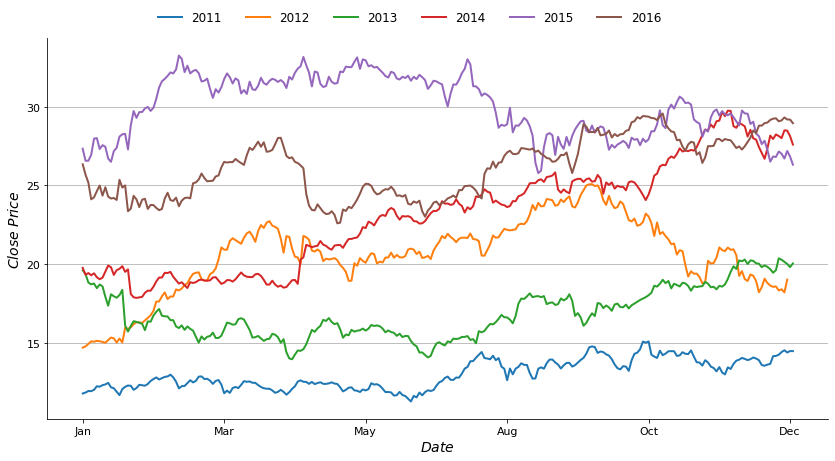

In [35]:
plt.figure(figsize=(14, 7))
ax = df1.plot(lw=2)
df2.plot(ax=ax, lw=2)
df3.plot(ax=ax, lw=2)
df4.plot(ax=ax, lw=2)
df5.plot(ax=ax, lw=2)
df6.plot(ax=ax, lw=2)
plt.xticks(np.arange(0, 252, 50), labels=["Jan", "Mar", "May", "Aug", "Oct", "Dec"])
ax.legend(["2011", "2012", "2013", "2014", "2015", "2016"],
         bbox_to_anchor=[0.8,1.1], ncol=6, frameon=False, prop={"size":12})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel("$Date$", fontsize=14)
ax.set_ylabel("$Close$ $Price$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(axis="y")
plt.show()

In [36]:
## NASDAQ
dji_df_time = nasdaq_df.copy()
dji_df_time.fillna(0, inplace=True)

NameError: name 'nasdaq_df' is not defined

In [ ]:
df1 = dji_df_time.loc["2011":"2012"]["Close"].copy().reset_index()["Close"]
df2 = dji_df_time.loc["2012":"2013"]["Close"].copy().reset_index()["Close"]
df3 = dji_df_time.loc["2013":"2014"]["Close"].copy().reset_index()["Close"]
df4 = dji_df_time.loc["2014":"2015"]["Close"].copy().reset_index()["Close"]
df5 = dji_df_time.loc["2015":"2016"]["Close"].copy().reset_index()["Close"]
df6 = dji_df_time.loc["2016":"2017"]["Close"].copy().reset_index()["Close"]

In [ ]:
plt.figure(figsize=(14, 7))
ax = df1.plot(lw=2)
df2.plot(ax=ax, lw=2)
df3.plot(ax=ax, lw=2)
df4.plot(ax=ax, lw=2)
df5.plot(ax=ax, lw=2)
df6.plot(ax=ax, lw=2)
plt.xticks(np.arange(0, 252, 50), labels=["Jan", "Mar", "May", "Aug", "Oct", "Dec"])
ax.legend(["2011", "2012", "2013", "2014", "2015", "2016"],
         bbox_to_anchor=[0.8,1.1], ncol=6, frameon=False, prop={"size":12})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel("$Date$", fontsize=14)
ax.set_ylabel("$Close$ $Price$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

#### Autocorrelation plot

In [ ]:
## DJI, NASDAQ, ETC
fig = plt.figure(figsize=(14, 7))
aapl_df_time = aapl_df.copy()
aapl_df_time.fillna(0, inplace=True)
ax = pd.plotting.autocorrelation_plot(aapl_df_time["2011":"2016"]["Close"], lw=2)
ax.set_xlabel("$Lag$", fontsize=14)
ax.set_ylabel("$Autocorrelation$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()